<img src="./ham.png">
<img src="./opden.png">
<img src="./Obs.png">

In [1]:
#Para construir a tabela(dataframe) que será usada para treinar o modelo vamos usar o Pandas.
import numpy as np                                                                                                                  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sympy.physics.quantum import TensorProduct
from time import perf_counter 
from scipy.linalg import expm
from cmath import  *
from decimal import *
#from math import *

#A classe DinamicaPontosQuanticos calcula a dinamica no intervalo desejado e cria a tabela com os resultados.
class DinamicaPontosQuanticos:
  
    def __init__(self, aInicial=0, aFinal=1, passoA = 0.1, bInicial=0
                 , bFinal=1, passoB = 0.1, jInicial=0, jFinal=10, passoJ = 0.1 
                 , tInicial=5, tFinal=25, passoT=5):
        self.aInicial = aInicial
        self.aFinal = aFinal
        self.bInicial = bInicial
        self.bFinal = bFinal
        self.jInicial = jInicial
        self.jFinal = jFinal
        self.tInicial = tInicial
        self.tFinal = tFinal
        self.passoA = passoA
        self.passoB = passoB
        self.passoJ = passoJ
        self.passoT = passoT
        
        #roInicial
        self.ro0 = np.array([[1,0,0,0], [0,0,0,0], [0,0,0,0],[0,0,0,0]])
        
        #Criando as matrizes de Pauli-X, Pauli-Y, e Pauli-Z.
        self.sigmaX = np.array([[0, 1], [1, 0]])
        self.sigmaY = np.array([[0, -1j], [1j, 0]])
        self.sigmaZ = np.array([[1, 0], [0, -1]])
        
        #Matriz identidade.
        self.ident = np.identity(2)
        
        #Algumas constantes que são usadas diversas vezes para os calculos.
        self.tensorProductIdentSigX = TensorProduct(self.ident, self.sigmaX)
        self.tensorProductSigXIdent = TensorProduct(self.sigmaX, self.ident)
        self.tensorProductIdentSigY = TensorProduct(self.ident, self.sigmaY)
        self.tensorProductSigYIdent = TensorProduct(self.sigmaY, self.ident)
        self.tensorProductIdentSigZ = TensorProduct(self.ident, self.sigmaZ)
        self.tensorProductSigZIdent = TensorProduct(self.sigmaZ, self.ident)
        self.tensorProductSigZIdentSoma = TensorProduct(self.sigmaZ, self.ident) + TensorProduct(self.ident, self.sigmaZ)
        self.tensorProductSigZSigZ = TensorProduct(self.sigmaZ, self.sigmaZ)
    

    #Definição da equação da dinâmica de pontos quanticos.
    def hamiltoniana(self,a,b,j):
        #print('a:\n', a)
        #print('b:\n', b)
        #print('j:\n', j)
        #print('resultado:\n', np.matmul(a,self.tensorProductIdentSigX) + np.matmul(b,self.tensorProductSigXIdent) + self.tensorProductSigZIdentSoma  + np.matmul(j,self.tensorProductSigZSigZ))
        #input()
        return  np.multiply(a,self.tensorProductIdentSigX) + np.multiply(b,self.tensorProductSigXIdent) + self.tensorProductSigZIdentSoma  + np.multiply(j,self.tensorProductSigZSigZ)
    
    #Definindo a função operador temporal.
    def u(self,t, h):
        eq1 = np.multiply(h,t)
        eq2 = np.multiply(eq1,(1j))
        eq3 = np.multiply(-1, eq2)
        #result = expm((np.matmul(np.matmul(h,t),(-1j))))
        result = expm(eq3)
        #print('result:', result)
        return result

    #Definindo a função operador densidade.
    def ro(self,t, h):
        u = self.u(t, h)
        #print('h:\n', h)
        #print('resultado ro:\n', np.matmul(np.matmul(u,self.ro0), np.array(np.matrix(u).getH())))
        #input()
        return np.matmul(np.matmul(u,self.ro0), np.array(np.matrix(u).getH()))


    #--------------------------------------------------
    #Observaveis:
    #Definindo a função O^(1)_x 
    def Ox1(self,ro):
        a = np.matmul(self.tensorProductSigXIdent, ro)
        return np.trace(a)


    #Definindo a função O^(2)_x 
    def Ox2(self,ro):
        a = np.matmul(self.tensorProductIdentSigX, ro)
        return np.trace(a)

    #--------------------------------------------------
    #Definindo a função O^(1)_y 
    def Oy1(self,ro):
        a = np.matmul(self.tensorProductSigYIdent, ro)
        return np.trace(a)


    #Definindo a função O^(2)_y 
    def Oy2(self,ro):
        a = np.matmul(self.tensorProductIdentSigY, ro)
        return np.trace(a)

    #--------------------------------------------------
    #Definindo a função O^(1)_z 
    def Oz1(self,ro):
        a = np.matmul(self.tensorProductSigZIdent, ro)
        return np.trace(a)


    #Definindo a função O^(2)_z 
    def Oz2(self,ro):
        a = np.matmul(self.tensorProductIdentSigZ, ro)
        return np.trace(a)
        
    def countDecimal(self):
        passos = [self.passoA, self.passoB, self.passoJ, self.passoT]
        decimals = np.array([])
        for passo in passos:
            decimals = np.append(decimals, 10**(-Decimal(str(passo)).as_tuple().exponent))
        return (decimals[0], decimals[1], decimals[2], decimals[3]) 
    
    def criaFrame(self):
        t0 = perf_counter()
        results = np.array([])
        decimalA, decimalB, decimalJ, decimalT = self.countDecimal()
        print("inicial:", self.jInicial*decimalJ)
        print("final:", decimalJ*self.jFinal+self.passoJ*decimalJ)
        print("passo:", self.passoJ*decimalJ)
        print('self.passo:', self.passoJ)
        print('decimalA:', decimalA)
        print('decimalB:', decimalB)
        print('decimalJ:', decimalJ)
        print('decimalT:', decimalT)
        arrayA = np.arange(self.aInicial*decimalA, decimalA*self.aFinal+self.passoA*decimalA, self.passoA*decimalA)
        arrayB = np.arange(self.bInicial*decimalB, decimalB*self.bFinal+self.passoB*decimalB, self.passoB*decimalB)
        arrayJ = np.arange(self.jInicial*decimalJ, decimalJ*self.jFinal+self.passoJ*decimalJ, self.passoJ*decimalJ)
        arrayT = np.arange(self.tInicial*decimalT, decimalT*self.tFinal+self.passoT*decimalT, self.passoT*decimalT)
        print("arrayJ:", arrayJ)
        print("arrayA:", arrayA)
        print("arrayB:", arrayB)
        print("arrayT:", arrayT)
        
        for jDez in arrayJ:
            j = jDez/decimalJ
            for aDez in arrayA:
                a = aDez/decimalA 
                for bDez in arrayB:
                    b = bDez/decimalB
                    resultsOx = np.array([])
                    hvalor = self.hamiltoniana(a, b, j)
                    for tDez in arrayT:
                        t = tDez/decimalT
                        rovalor = self.ro(t,hvalor)
                        ox1 = np.float32(self.Ox1(rovalor))
                        ox2 = np.float32(self.Ox2(rovalor))
                        oy1 = np.float32(self.Oy1(rovalor))
                        oy2 = np.float32(self.Oy2(rovalor))
                        oz1 = np.float32(self.Oz1(rovalor))
                        oz2 = np.float32(self.Oz2(rovalor))
                        resultsOx =  np.append(resultsOx,[ox1, ox2, oy1, oy2, oz1, oz2])

                    resultsOxJ = np.append(j,resultsOx)
                    results = np.append(results, resultsOxJ)

        t1 = perf_counter()
        colunas = int((((((self.tFinal - self.tInicial)/self.passoT)+1)*6)+1))
        linhas = int(len(results)/colunas)
        
        print('colunas:', colunas)
        print("Total tempo gasto: ", t1 - t0)   
        print("results shape:", results.shape)
        print("Tamanho:", len(results))
        print('linhas:', linhas)
        return np.float32(results.reshape(linhas, colunas))
    
    #dataframe
    def getNames(self):
        listO = [['ox1T' + str(tempo),'ox2T' + str(tempo), 'oy1T' + str(tempo), 'oy2T' + str(tempo), 'oz1T' + str(tempo),'oz2T' + str(tempo)] for tempo in np.arange(self.tInicial, self.tFinal + self.passoT, self.passoT)]
        listOFlat = np.array([])
        for tempos in listO:
            listOFlat = np.append(listOFlat, np.array(tempos))
        return np.append(['jTarget'], listOFlat)
    
    def criaDataFrame(self):
        return pd.DataFrame(self.criaFrame(), columns = self.getNames())
    
    def criaFrameGraficos(self):
        t0 = perf_counter()
        results = np.array([])
        decimalA, decimalB, decimalJ, decimalT = self.countDecimal()
        print("inicial:", self.jInicial*decimalJ)
        print("final:", decimalJ*self.jFinal+self.passoJ*decimalJ)
        print("passo:", self.passoJ*decimalJ)
        print('self.passo:', self.passoJ)
        print('decimalA:', decimalA)
        print('decimalB:', decimalB)
        print('decimalJ:', decimalJ)
        print('decimalT:', decimalT)
        arrayA = np.arange(self.aInicial*decimalA, decimalA*self.aFinal+self.passoA*decimalA, self.passoA*decimalA)
        arrayB = np.arange(self.bInicial*decimalB, decimalB*self.bFinal+self.passoB*decimalB, self.passoB*decimalB)
        arrayJ = np.arange(self.jInicial*decimalJ, decimalJ*self.jFinal+self.passoJ*decimalJ, self.passoJ*decimalJ)
        arrayT = np.arange(self.tInicial*decimalT, decimalT*self.tFinal+self.passoT*decimalT, self.passoT*decimalT)
        ox1 = np.array([])
        ox2 = np.array([])
        oy1 = np.array([])
        oy2 = np.array([])
        oz1 = np.array([])
        oz2 = np.array([])
        tempos = np.array([])
        print("arrayJ:", arrayJ/decimalJ)
        print("arrayA:", arrayA/decimalA)
        print("arrayB:", arrayB/decimalB)
        print("arrayT:", arrayT/decimalT)
        for jDez in arrayJ:
            j = jDez/decimalJ
            for aDez in arrayA:
                a = aDez/decimalA 
                for bDez in arrayB:
                    b = bDez/decimalB
                    resultsOx = np.array([])
                    hvalor = self.hamiltoniana(a, b, j)
                    for tDez in arrayT:
                        t = tDez/10
                        rovalor = self.ro(t,hvalor)
                        ox1 = np.float32(np.append(ox1, self.Ox1(rovalor)))
                        ox2 = np.float32(np.append(ox2, self.Ox2(rovalor)))
                        oy1 = np.float32(np.append(oy1, self.Oy1(rovalor)))
                        oy2 = np.float32(np.append(oy2, self.Oy2(rovalor)))
                        oz1 = np.float32(np.append(oz1, self.Oz1(rovalor)))
                        oz2 = np.float32(np.append(oz2, self.Oz2(rovalor)))
                        tempos = np.append(tempos, t)

        t1 = perf_counter()
        
        print('ox1 shape:', ox1.shape)
        print('ox2 shape:', ox2.shape)
        print('oy1 shape:', oy1.shape)
        print('oy2 shape:', oy2.shape)
        print('oz1 shape:', oz1.shape)
        print('oz2 shape:', oz2.shape)
        print('tempos shape:', tempos.shape)
        print("Total tempo gasto: ", t1 - t0)
        return pd.DataFrame(ox1, columns = ['ox1']), pd.DataFrame(ox2, columns = ['ox2']), pd.DataFrame(oy1, columns = ['oy1']), pd.DataFrame(oy2, columns = ['oy2']), pd.DataFrame(oz1, columns = ['oz1']), pd.DataFrame(oz2, columns = ['oz2']), pd.DataFrame(tempos, columns = ['tempo'])
    
    def criaGraficos(self, dataFrame, tempos):
        fig, ax = plt.subplots()
        ax.plot(tempos, dataFrame)
        ax.set(xlabel='tempo', ylabel = dataFrame.columns, title = dataFrame.columns)
        ax.grid()
        #fig.savefig("test.png")
        plt.show()
        
        
        

In [2]:
dpq = DinamicaPontosQuanticos(aInicial = 0, bInicial = 0, passoJ = 0.01)
#print("dpq nomes:", dpq.getNames())
#print("dpq len:", len(dpq.getNames()))
df = dpq.criaDataFrame()

#exemplo = df.sample(n=10000)
#print(exemplo.index)
#df = df.drop(index=exemplo.index)

inicial: 0.0
final: 1001.0
passo: 1.0
self.passo: 0.01
decimalA: 10.0
decimalB: 10.0
decimalJ: 100.0
decimalT: 1.0
arrayJ: [   0.    1.    2. ...  998.  999. 1000.]
arrayA: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
arrayB: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
arrayT: [ 5. 10. 15. 20. 25.]


<ipython-input-1-8fb57fbf6a03>:158: ComplexWarning: Casting complex values to real discards the imaginary part
  ox1 = np.float32(self.Ox1(rovalor))
<ipython-input-1-8fb57fbf6a03>:159: ComplexWarning: Casting complex values to real discards the imaginary part
  ox2 = np.float32(self.Ox2(rovalor))
<ipython-input-1-8fb57fbf6a03>:160: ComplexWarning: Casting complex values to real discards the imaginary part
  oy1 = np.float32(self.Oy1(rovalor))
<ipython-input-1-8fb57fbf6a03>:161: ComplexWarning: Casting complex values to real discards the imaginary part
  oy2 = np.float32(self.Oy2(rovalor))
<ipython-input-1-8fb57fbf6a03>:162: ComplexWarning: Casting complex values to real discards the imaginary part
  oz1 = np.float32(self.Oz1(rovalor))
<ipython-input-1-8fb57fbf6a03>:163: ComplexWarning: Casting complex values to real discards the imaginary part
  oz2 = np.float32(self.Oz2(rovalor))


KeyboardInterrupt: 

In [11]:
df['jTarget']
#df.to_excel('/home/codemaster/Dinamica Pontos Quanticos/teste')
#filter_col = [col for col in df if col.startswith('oz')]

0         0.000
1         0.001
2         0.002
3         0.003
4         0.004
          ...  
9996      9.996
9997      9.997
9998      9.998
9999      9.999
10000    10.000
Name: jTarget, Length: 10001, dtype: float32

In [8]:
df[filter_col]

NameError: name 'df' is not defined

##5º Passo:

Preprocessamento dos dados + Analise dos algoritmos de Regressão

In [32]:
from sklearn.model_selection import train_test_split
from pycaret.utils import enable_colab
from pycaret.regression import * 

train, test = train_test_split(df, test_size=0.3)
regression = setup(data = df, target='jTarget', preprocess= True, use_gpu= False, normalize=True, normalize_method = 'zscore', profile=False)



,Description,Value
0,session_id,950
1,Target,jTarget
2,Original Data,"(121121, 31)"
3,Missing Values,False
4,Numeric Features,30
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(84784, 30)"


In [ ]:
best = compare_models(turbo = True)

IntProgress(value=0, description='Processing: ', max=99)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:19:31
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,1.2519,3.0999,1.7606,0.6295,0.3174,0.5971,1.3070
dt,Decision Tree Regressor,1.3019,4.0026,2.0005,0.5216,0.3777,0.5703,2.7340
lr,Linear Regression,1.8276,4.8876,2.2108,0.4158,0.4558,1.6011,0.4250
ridge,Ridge Regression,1.8276,4.8876,2.2108,0.4158,0.4558,1.6011,0.0280
br,Bayesian Ridge,1.8277,4.8875,2.2108,0.4158,0.4558,1.6013,0.1500
huber,Huber Regressor,1.8213,4.9147,2.2169,0.4126,0.4583,1.6225,0.4200
omp,Orthogonal Matching Pursuit,1.9632,5.5491,2.3556,0.3368,0.4960,2.0095,0.0340
en,Elastic Net,2.0249,5.6334,2.3735,0.3267,0.5013,1.8393,0.0560
lasso,Lasso Regression,2.3197,7.1148,2.6674,0.1496,0.5804,2.5765,0.0700
llar,Lasso Least Angle Regression,2.5061,8.3677,2.8927,-0.0001,0.6265,3.1016,0.4530



Graficos:
----------------------------------------------------------------

In [56]:
dpqMin = DinamicaPontosQuanticos(aInicial = 0, aFinal = 0, bInicial=0, bFinal = 0, jInicial = 0, jFinal = 0, tInicial = 5, tFinal = 8, passoT = 0.1)
ox1, ox2, oy1, oy2, oz1, oz2, tempos = dpqMin.criaFrameGraficos()

arrayJ: [0]
arrayA: [0]
arrayB: [0]
arrayT: [50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67.
 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.]
ox1 shape: (31,)
ox2 shape: (31,)
oy1 shape: (31,)
oy2 shape: (31,)
oz1 shape: (31,)
oz2 shape: (31,)
tempos shape: (31,)
Total tempo gasto:  0.05789975301013328


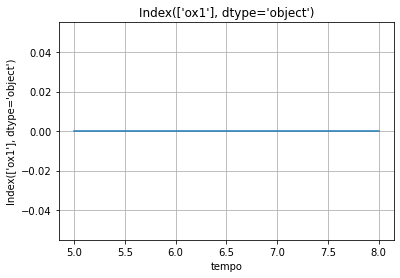

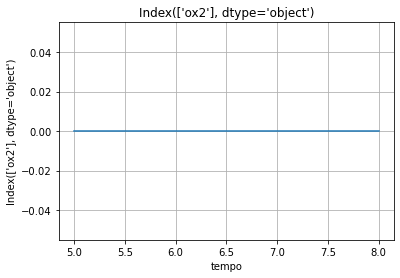

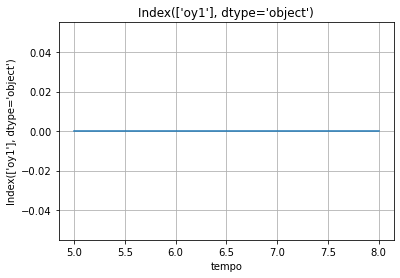

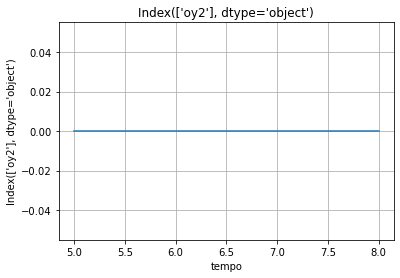

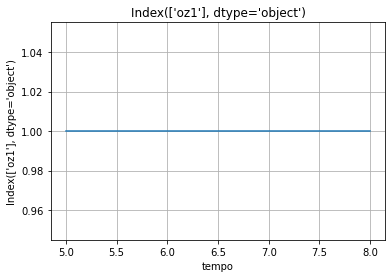

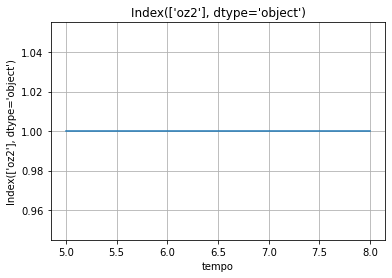

In [57]:
dpqMin.criaGraficos(ox1, tempos)
dpqMin.criaGraficos(ox2, tempos)
dpqMin.criaGraficos(oy1, tempos)
dpqMin.criaGraficos(oy2, tempos)
dpqMin.criaGraficos(oz1, tempos)
dpqMin.criaGraficos(oz2, tempos)

In [58]:
dpqMin = DinamicaPontosQuanticos(aInicial = 1, aFinal = 1, bInicial = 1, bFinal = 1, jInicial = 10, jFinal = 10, tInicial = 5, tFinal = 8, passoT = 0.1)
ox1, ox2, oy1, oy2, oz1, oz2, tempos = dpqMin.criaFrameGraficos()

arrayJ: [100]
arrayA: [10]
arrayB: [10]
arrayT: [50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67.
 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80.]
ox1 shape: (31,)
ox2 shape: (31,)
oy1 shape: (31,)
oy2 shape: (31,)
oz1 shape: (31,)
oz2 shape: (31,)
tempos shape: (31,)
Total tempo gasto:  0.0489186070044525


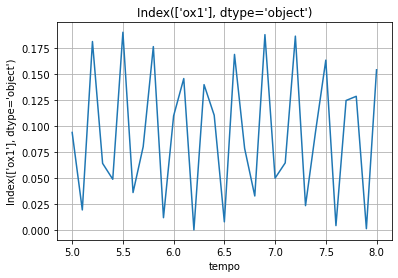

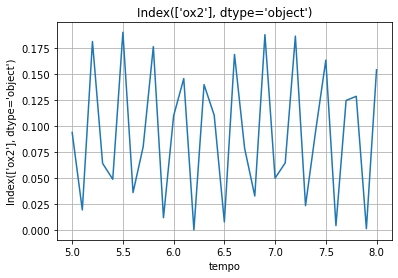

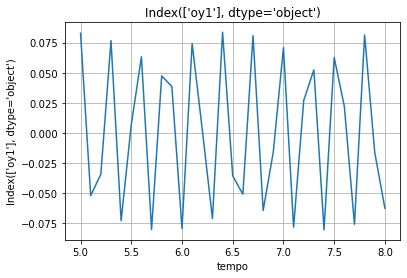

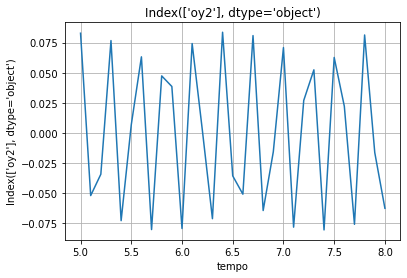

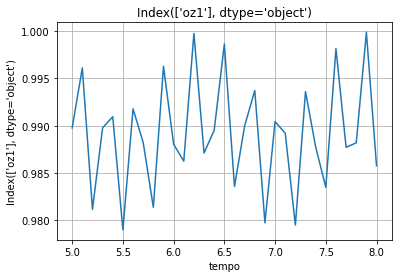

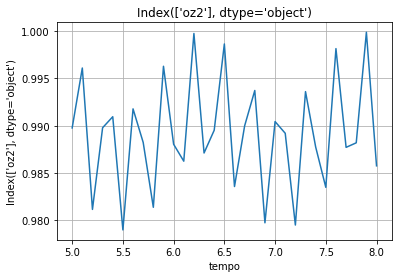

In [59]:
dpqMin.criaGraficos(ox1, tempos)
dpqMin.criaGraficos(ox2, tempos)
dpqMin.criaGraficos(oy1, tempos)
dpqMin.criaGraficos(oy2, tempos)
dpqMin.criaGraficos(oz1, tempos)
dpqMin.criaGraficos(oz2, tempos)

In [48]:
dpqMin = DinamicaPontosQuanticos(aInicial = 0.5, aFinal = 0.5, bInicial = 0.5, bFinal = 0.5, jInicial = 5, jFinal = 5, tInicial = 5, tFinal = 25, passoT = 0.1)
ox1, ox2, oy1, oy2, oz1, oz2, tempos = dpqMin.criaFrameGraficos()

arrayJ: [50]
arrayA: [5.]
arrayB: [5.]
arrayT: [ 50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231.
 232. 233. 234. 235. 236. 237.

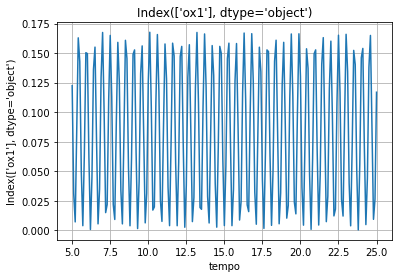

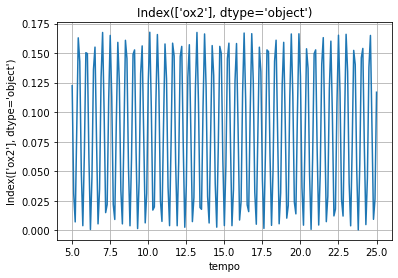

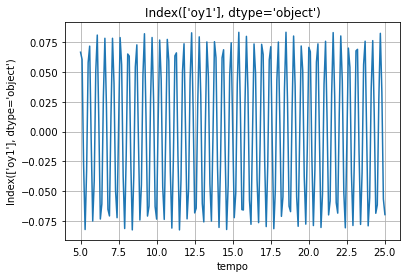

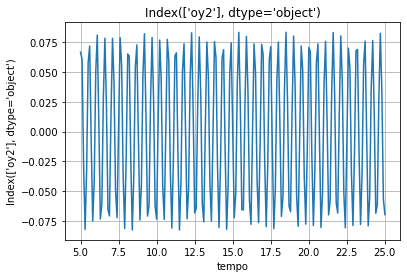

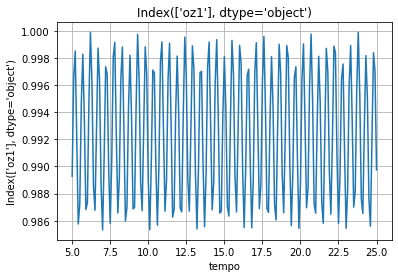

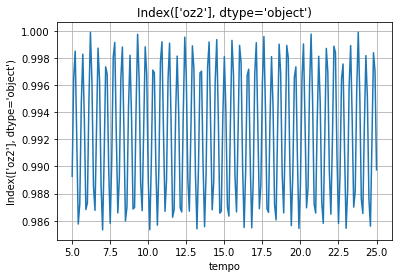

In [49]:
dpqMin.criaGraficos(ox1, tempos)
dpqMin.criaGraficos(ox2, tempos)
dpqMin.criaGraficos(oy1, tempos)
dpqMin.criaGraficos(oy2, tempos)
dpqMin.criaGraficos(oz1, tempos)
dpqMin.criaGraficos(oz2, tempos)

In [203]:
dpqMin = DinamicaPontosQuanticos(aInicial = 1, aFinal = 1, bInicial = 0, bFinal = 0, jInicial = 10, jFinal = 10, tInicial = 5, tFinal = 25, passoT = 0.1)
ox1, ox2, oy1, oy2, oz1, oz2, tempos = dpqMin.criaFrameGraficos()

arrayJ: [100]
arrayA: [10]
arrayB: [0]
arrayT: [ 50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231.
 232. 233. 234. 235. 236. 237.

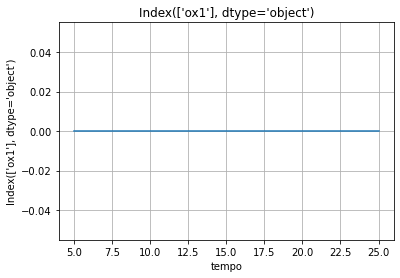

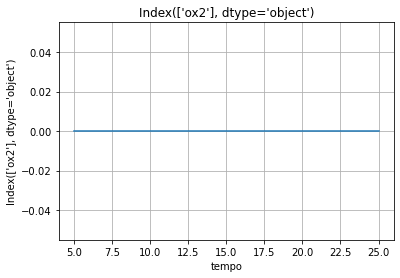

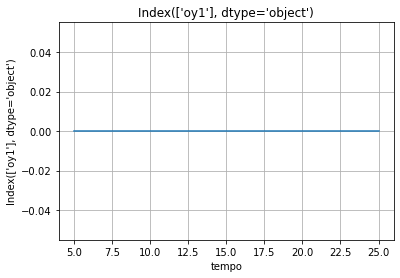

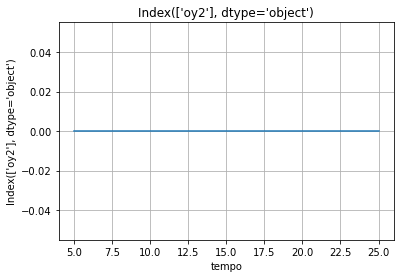

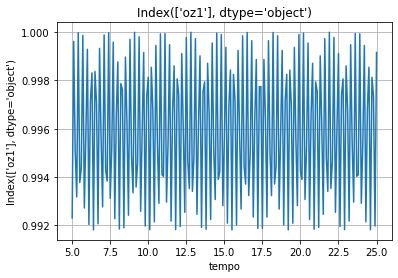

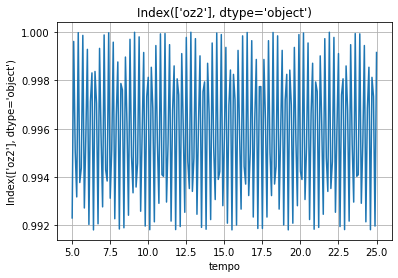

In [204]:
dpqMin.criaGraficos(ox1, tempos)
dpqMin.criaGraficos(ox2, tempos)
dpqMin.criaGraficos(oy1, tempos)
dpqMin.criaGraficos(oy2, tempos)
dpqMin.criaGraficos(oz1, tempos)
dpqMin.criaGraficos(oz2, tempos)

arrayJ: [100]
arrayA: [5.]
arrayB: [3.]
arrayT: [ 50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.
  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.
  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.
  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105.
 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119.
 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231.
 232. 233. 234. 235. 236. 237

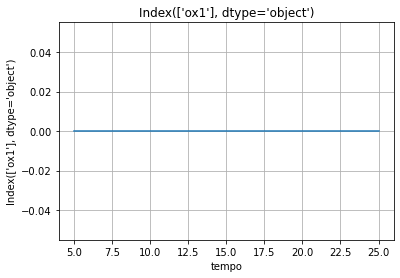

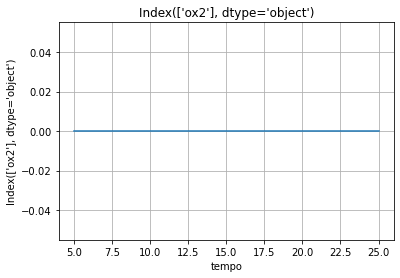

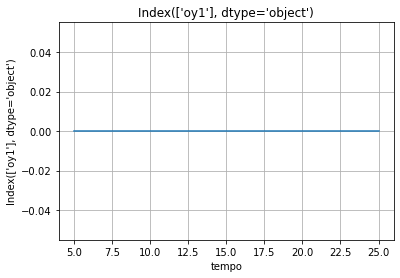

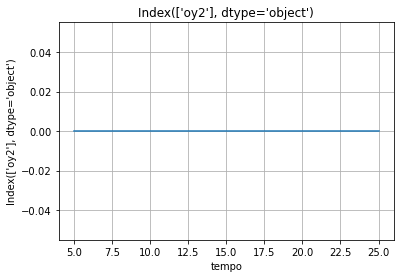

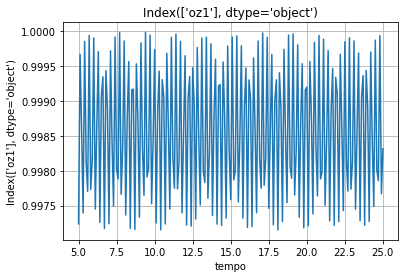

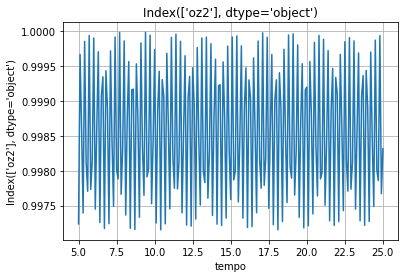

In [205]:
dpqMin = DinamicaPontosQuanticos(aInicial = 0.5, aFinal = 0.5, bInicial = 0.3, bFinal = 0.3, jInicial = 10, jFinal = 10, tInicial = 5, tFinal = 25, passoT = 0.1)
ox1, ox2, oy1, oy2, oz1, oz2, tempos = dpqMin.criaFrameGraficos()
dpqMin.criaGraficos(ox1, tempos)
dpqMin.criaGraficos(ox2, tempos)
dpqMin.criaGraficos(oy1, tempos)
dpqMin.criaGraficos(oy2, tempos)
dpqMin.criaGraficos(oz1, tempos)
dpqMin.criaGraficos(oz2, tempos)

Montando o Modelo:

In [25]:
from pycaret.utils import enable_colab
from pycaret.regression import * 

regression = setup(data = df, target='jTarget', preprocess= True, use_gpu= False, normalize=True, normalize_method = 'zscore', profile=False)
# create a model
et = create_model('et')
# predict on hold-out
pred_holdout = predict_model(et)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1572,0.0949,0.3081,0.9879,0.0728,0.0457
1,0.0922,0.0168,0.1298,0.9981,0.0272,0.0241
2,0.2188,0.4719,0.6869,0.9368,0.1455,0.0810
3,0.1011,0.0262,0.1618,0.9970,0.0310,0.0241
4,0.1063,0.0520,0.2280,0.9915,0.0552,0.0319
5,0.1194,0.0905,0.3008,0.9902,0.0715,0.0379
6,0.1001,0.0226,0.1503,0.9974,0.0260,0.0456
7,0.0891,0.0198,0.1405,0.9975,0.0302,0.0268
8,0.1236,0.0406,0.2015,0.9946,0.0493,0.0369
9,0.1389,0.0554,0.2353,0.9930,0.0368,0.0459


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1250,0.0777,0.2788,0.9912,0.0621,0.0515


In [26]:
et_final = finalize_model(et)

# generate predictions on unseen data
predictions = predict_model(et_final, data = df)

In [27]:
predictions
sub = np.subtract(predictions['jTarget'], predictions['Label'])
print(sub.sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
996     0.0
997     0.0
998     0.0
999     0.0
1000    0.0
Length: 1001, dtype: float64>


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
sub = np.subtract(predictions['jTarget'], predictions['Label'])
fig, ax = plt.subplots()
ax.plot(tempos, dataFrame)
ax.set(xlabel='jtarget', ylabel = dataFrame.columns, title = dataFrame.columns)
ax.grid()
#fig.savefig("test.png")
plt.show()